In [ ]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("archive.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall( )

In [ ]:


import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder


def load_images_from_folders(root_dir, img_size=(50, 50)):
    data = []
    labels = []
    folder_names = sorted(os.listdir(root_dir))  # Alphabetical order

    for folder in folder_names:
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Only images
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Grayscale for MNIST-like input
                    img = cv2.resize(img, img_size)  # Resize to standard input size
                    data.append(img)
                    labels.append(folder)  # Use folder name as label

    data = np.array(data, dtype=np.float32) / 255.0  # Normalize
    old_labels=labels
    labels = LabelEncoder().fit_transform(labels)  # Convert text labels to numbers

    return data, labels, old_labels

# Example usage
root_directory = "images"
X, y, y_names = load_images_from_folders(root_directory)

print(f"Loaded {len(X)} images with {len(set(y))} unique labels.")


Loaded 2503 images with 898 unique labels.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} images")
print(f"Testing set: {len(X_test)} images")


Training set: 2002 images
Testing set: 501 images


698
['Eelektrik', 'Eelektrik', 'Eelektross', 'Eelektross', 'Eevee']
898
2503


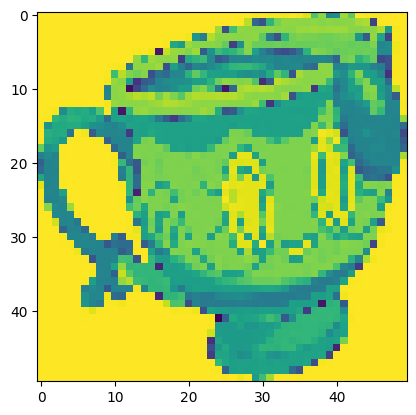

In [ ]:
import matplotlib.pyplot as plt

count =6
plt.imshow(X_train[count])
print(y_train[count])
print(y_names[573:578])
print(len(set(y)))

print(len(X))


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.datasets import mnist




Importing necessary libraries importing mnist databset defining train dataset and test dataset split is not necessary as mnist imported from tensorflow already has a split. We can use from sklearn.model_selection import train_test_split and define the slpit by test_size=0.2(20% for testing) or KFold(in case sample is small)

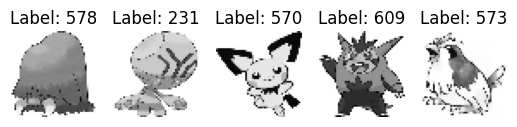

In [ ]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

element in training array are observed by plotting digit images and their labels.

In [ ]:
#X_train = X_train / 255.0 # normalization to scale them to range 0-1 helps model learn better
#X_test = X_test / 255.0

# Reshape the images to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1) #the model expects an extra "channel" dimension. For grayscale images this is 1.
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"New training data shape: {X_train.shape}")
print(f"New testing data shape: {X_test.shape}")


New training data shape: (60000, 28, 28, 1)
New testing data shape: (10000, 28, 28, 1)


Normalizing the pixel values from range 0-255 to 0-1, helps the model learn better. Reshaping the images to add a channel(color) dimension.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(898, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 898)                 │         460,674 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,254,914 (27.68 MB)

 Trainable params: 7,254,914 (27.68 MB)

 Non-trainable params: 0 (0.00 B)

Building a basic convolutional neural network (CNN), Sequential: stack layers to build model , Layers are: Conv2D (for 2D input like images),MaxPooling2D(Downsamples the input),Flatten(input to 1D),Dense(Fully connected neural network layer). adam: adaptive learning rate optimization algorithm widely used, loss function: the one used is appropriate when labels are int and calculates cross-entropy loss between labels and predictions, metric tracks accuracy during training and evaluation.

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 767ms/step - accuracy: 6.5057e-04 - loss: 6.8139 - val_accuracy: 0.0050 - val_loss: 6.8076
Epoch 2/5
 4/57 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.0104 - loss: 6.7865

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


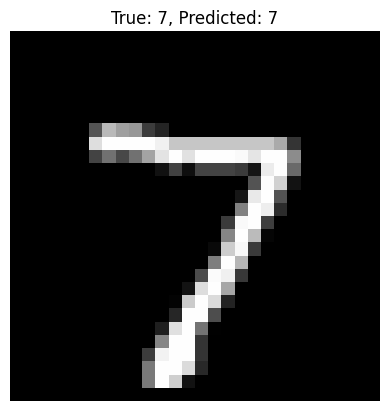

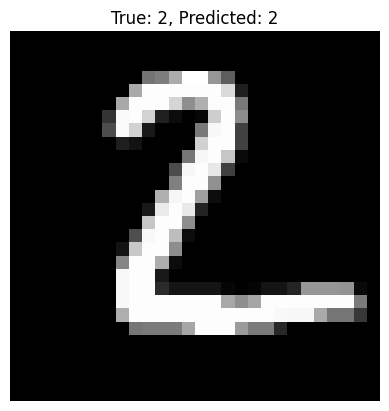

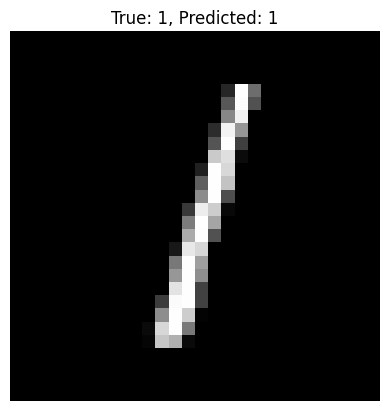

In [ ]:
predictions = model.predict(X_test[:3])

for i in range(3):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save('mnist_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      1.00      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 98.23%


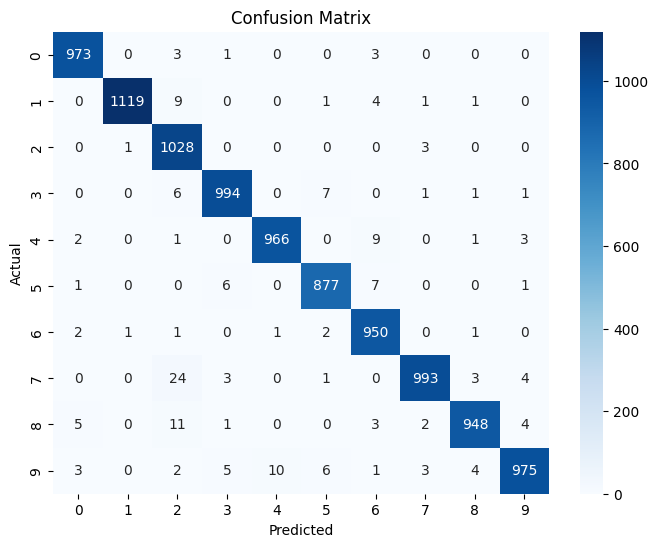

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is trained
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Print classification report
print(classification_report(y_test, y_pred_classes))

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
